In [ ]:
import foodcosts.core as core
import matplotlib.pyplot as plt
import pandas as pd
import math
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

In [ ]:
def make_hotbar_sales():
    pd = core.get_query_res_as_pd("select * from v_resto_entreprise;")
    print(pd)
    return pd

In [ ]:
make_hotbar_sales()

config.ini file available... using that
    id                  name
0   14    R.E. ALLEN & OVERY
1   15   R.E. LHOIST CORBAIS
2   21         R.E. ZAVENTEM
3   22            R.E. CEFIC
4   24             R.E ALOST
5   34   R.E LHOIST NIVELLES
6   35  R.E LHOIST LIMELETTE
7   37         BOTANIC TOWER
8   38             R.E ENGIE
9   42          R.E THE HIVE
10  43       R.E EUROCONTROL
11  45        R.E LIGHTHOUSE
12  65         Immogra Park7
13  68         R.E. JanDeNul
14  69                ARAMIS
15  70        R.E. GLAVERBEL
16  71               R.E WPP


,id,name
0,14,R.E. ALLEN & OVERY
1,15,R.E. LHOIST CORBAIS
2,21,R.E. ZAVENTEM
3,22,R.E. CEFIC
4,24,R.E ALOST
5,34,R.E LHOIST NIVELLES
6,35,R.E LHOIST LIMELETTE
7,37,BOTANIC TOWER
8,38,R.E ENGIE
9,42,R.E THE HIVE


In [ ]:
sales_re = core.get_products_sold_for_a_re_as_pd(core.get_previous_n_day(10),core.get_today_date_string(), 'R.E. GLAVERBEL')

config.ini file available... using that


In [ ]:
sales_re.sort_values('units_sold', ascending=False)


,shop_name,day,product_name,units_sold,total_sales
0,R.E. GLAVERBEL,2023-03-20,PLAT DU JOUR 10.9,84.000,915.60000
103,R.E. GLAVERBEL,2023-03-22,SANDWICH BASE,80.000,286.40000
112,R.E. GLAVERBEL,2023-03-22,POTAGE DU JOUR PETIT,79.000,237.00000
156,R.E. GLAVERBEL,2023-03-23,POTAGE DU JOUR PETIT,78.000,234.00000
21,R.E. GLAVERBEL,2023-03-20,POTAGE DU JOUR PETIT,78.000,234.00000
...,...,...,...,...,...
204,R.E. GLAVERBEL,2023-03-24,MENDIANTS HOMEMADE (Chocolat noir),0.080,2.87600
73,R.E. GLAVERBEL,2023-03-21,MENDIANTS HOMEMADE (Chocolat blanc),0.078,2.80410
119,R.E. GLAVERBEL,2023-03-22,MENDIANTS HOMEMADE (Chocolat noir),0.070,2.51650
246,R.E. GLAVERBEL,2023-03-27,MENDIANTS HOMEMADE (Chocolat au lait),0.059,2.12105


In [ ]:
def get_products_order_for_a_re_as_pd(start_date, end_date, shop_name):
    # Construct the SQL query
    query = f"""
        SELECT v_resto_entreprise.name AS shop_name, 
               DATE(v_pos_order.created_at) AS day, 
               v_product.name AS product_name, 
                v_pos_order_line.product_id as product_id,
                count(v_pos_order_line.product_id) as total_order,
               SUM(v_pos_order_line.quantity) AS units_sold, 
               SUM(v_pos_order_line.quantity * v_product.price) AS total_sales
        FROM v_pos_order_line
        LEFT JOIN v_product ON v_product.id = v_pos_order_line.product_id
        LEFT JOIN v_pos_order ON v_pos_order.id = v_pos_order_line.order_id
        LEFT JOIN v_pos_session ON v_pos_session.id = v_pos_order.session_id
        LEFT JOIN v_pos ON v_pos.id = v_pos_session.pos_id
        LEFT JOIN v_resto_entreprise ON v_resto_entreprise.id = v_pos.shop_id
        WHERE v_pos_order.created_at BETWEEN '{start_date}' AND '{end_date}'
        AND v_resto_entreprise.name IN ('{shop_name}')
        AND (v_product.name LIKE '%PLAT DU JOUR%' OR
            v_product.name LIKE '%HOT BAR FTK%')
        GROUP BY v_resto_entreprise.id, v_resto_entreprise.name, day, v_product.id, v_product.name, v_pos_order_line.product_id
        ORDER BY v_resto_entreprise.name, day ASC;
    """
    return core.get_query_res_as_pd(query)

In [ ]:
re_restaurants = core.get_query_res_as_pd("select * from v_resto_entreprise;")

re_restaurants_sales_details = {
    re_restaurant_name: get_products_order_for_a_re_as_pd(
        core.get_previous_n_day(60),
        core.get_today_date_string(),
        re_restaurant_name
    )
    for re_restaurant_name in re_restaurants['name']
}

config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that
config.ini file available... using that


In [ ]:
def get_total_order(sales_details, product_name):
    unit_sold = sales_details[sales_details['product_name'].str.contains(product_name, regex=False)]['total_order']
    return unit_sold.values.sum();

def get_percetage(x, y):
    try:       
        x_percentage = round((x*100/(x+y)),2);
        y_percentage = round((y*100/(x+y)),2);
        
        return x_percentage, y_percentage;
    except ZeroDivisionError:
        return float('NaN'), float('NaN');

def getAxisPosition(sales):
    index = sales.index.values[0]
    x = index // 3;
    y = index % 3;
    return x, y;

In [ ]:
order_dict = {
        'Name':[],
        'PLAT DU JOUR':[],
        'HOT BAR':[],
       }
order_percentage_dict = {
        'Name':[],
        'PLAT DU JOUR(%)':[],
        'HOT BAR(%)':[],
       }

order_dataframe = pd.DataFrame(order_dict)
order_percentage_dataframe = pd.DataFrame(order_percentage_dict)

order_dataframe.style.set_caption("Hello World")

order_dataframe['PLAT DU JOUR'] = order_dataframe['PLAT DU JOUR'].astype('int')
order_dataframe['HOT BAR'] = order_dataframe['HOT BAR'].astype('int')

for re_restaurant_name in re_restaurants['name']:
    sales_details = re_restaurants_sales_details[re_restaurant_name];
        
    plat_du_jour_total_order = get_total_order(sales_details, 'PLAT DU JOUR');
    hot_bar_total_order = get_total_order(sales_details, 'HOT BAR');
    
    plat_du_jour_percentage, hot_bar_percentage = get_percetage(plat_du_jour_total_order, hot_bar_total_order);
    
    order_dataframe.loc[len(order_dataframe.index)] = [
        re_restaurant_name,
        plat_du_jour_total_order,
        hot_bar_total_order,
    ]
    
    order_percentage_dataframe.loc[len(order_percentage_dataframe.index)] = [
        re_restaurant_name,
        plat_du_jour_percentage,
        hot_bar_percentage,
    ]

display(order_dataframe)
display(order_percentage_dataframe)

,Name,PLAT DU JOUR,HOT BAR
0,R.E. ALLEN & OVERY,740,0
1,R.E. LHOIST CORBAIS,1246,0
2,R.E. ZAVENTEM,2677,2154
3,R.E. CEFIC,937,0
4,R.E ALOST,453,0
5,R.E LHOIST NIVELLES,512,0
6,R.E LHOIST LIMELETTE,915,0
7,BOTANIC TOWER,1349,0
8,R.E ENGIE,5640,2788
9,R.E THE HIVE,1268,1477


,Name,PLAT DU JOUR(%),HOT BAR(%)
0,R.E. ALLEN & OVERY,100.00,0.00
1,R.E. LHOIST CORBAIS,100.00,0.00
2,R.E. ZAVENTEM,55.41,44.59
3,R.E. CEFIC,100.00,0.00
4,R.E ALOST,100.00,0.00
5,R.E LHOIST NIVELLES,100.00,0.00
6,R.E LHOIST LIMELETTE,100.00,0.00
7,BOTANIC TOWER,100.00,0.00
8,R.E ENGIE,66.92,33.08
9,R.E THE HIVE,46.19,53.81


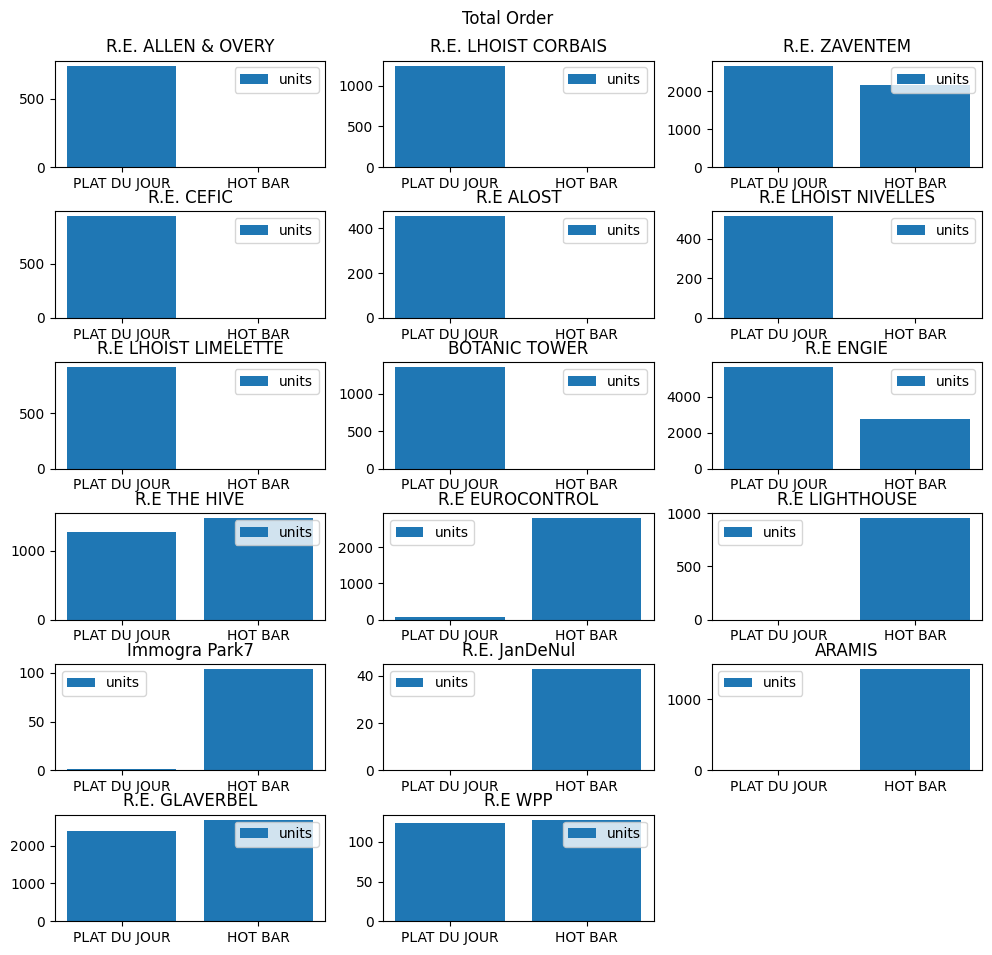

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(10, 10))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
for re_restaurant_name in re_restaurants['name']:
    sales = order_dataframe[order_dataframe['Name'] == re_restaurant_name];
    
    x, y = getAxisPosition(sales);
    ax[x, y].bar(
        ['PLAT DU JOUR', 'HOT BAR'],
        [sales['PLAT DU JOUR'].item(), sales['HOT BAR'].item()], label='units'
    )

    ax[x, y].legend()
    ax[x, y].set_title(f'{re_restaurant_name}')

ax.flat[-1].set_visible(False)
fig.suptitle('Total Order')

plt.show()

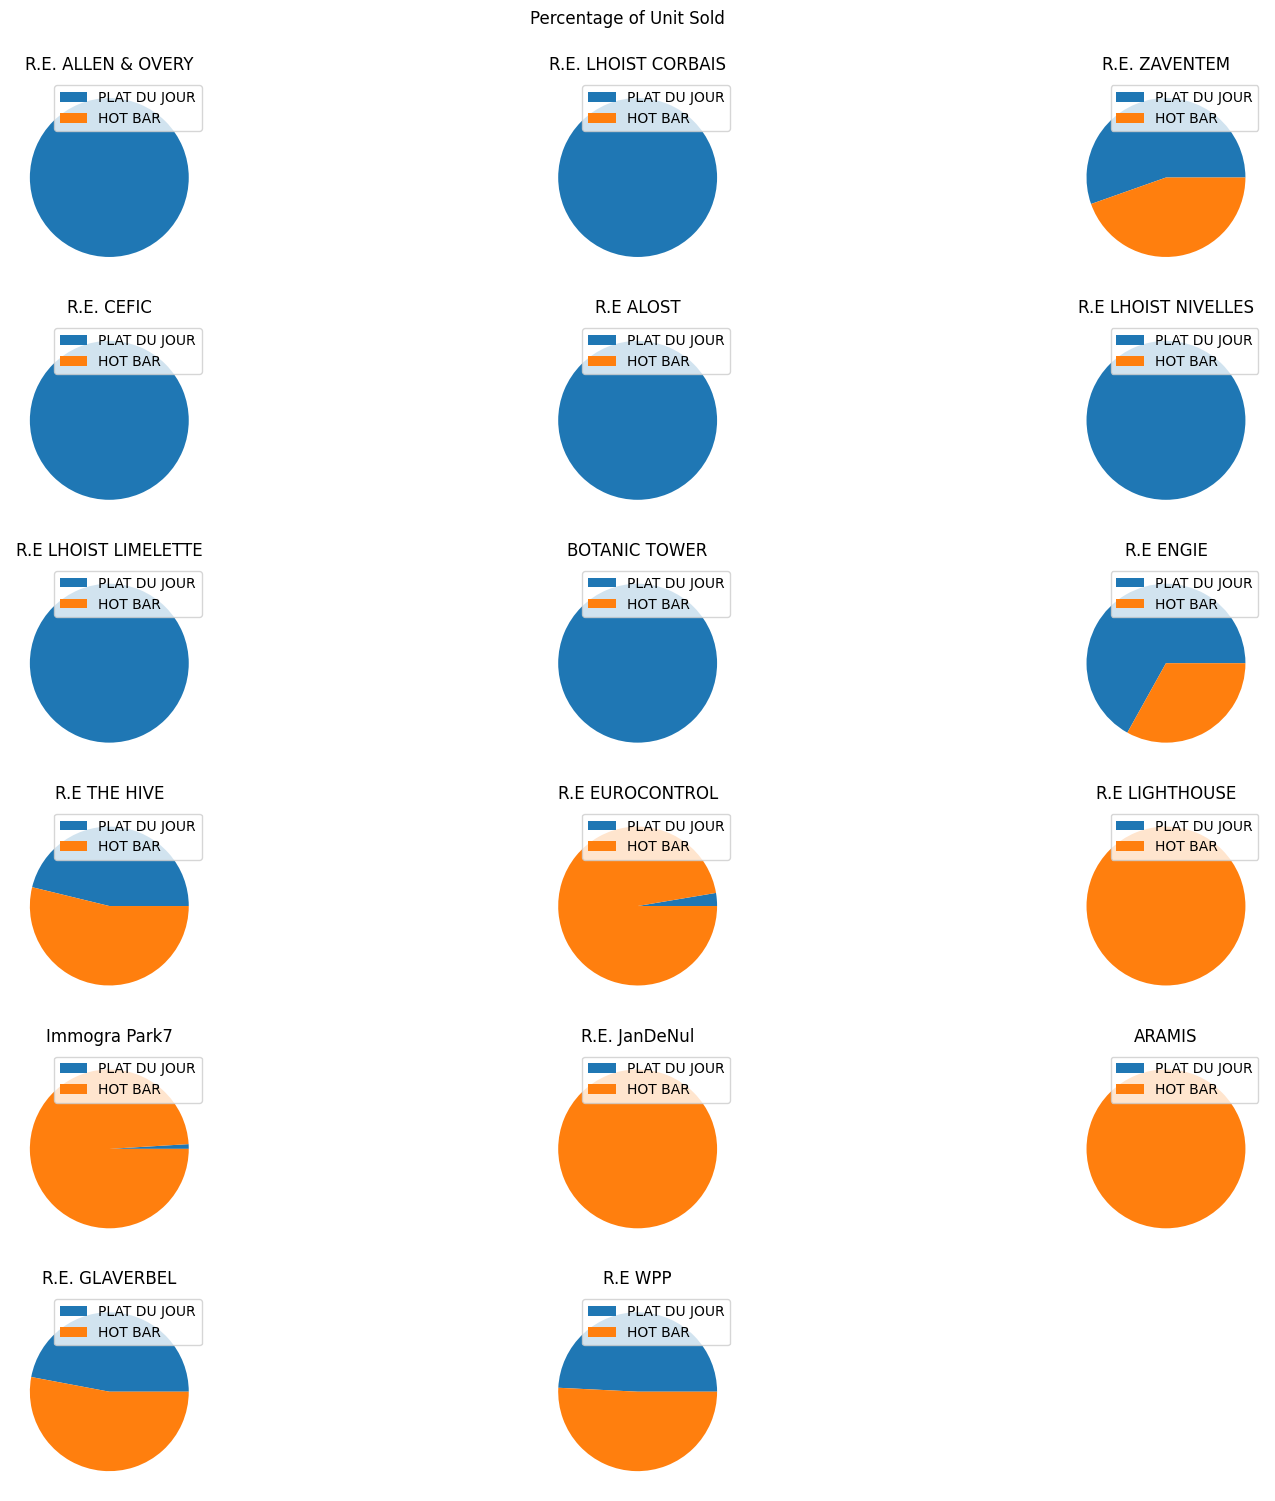

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(16, 16))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
for re_restaurant_name in re_restaurants['name']:
    sales = order_percentage_dataframe[order_percentage_dataframe['Name'] == re_restaurant_name];
    
    x, y = getAxisPosition(sales);
    
    plat_du_jour_sales_percentage = sales['PLAT DU JOUR(%)'].item()
    hot_bar_sales_percentage = sales['HOT BAR(%)'].item()
    
    if(math.isnan(plat_du_jour_sales_percentage) or math.isnan(hot_bar_sales_percentage)):
        print(f'Data is invalid to genarate pie chart for resturent: {re_restaurant_name}');
        ax[x, y].set_title(f'{re_restaurant_name}');
        continue;
    
    ax[x, y].pie(
        [plat_du_jour_sales_percentage, hot_bar_sales_percentage],
    )

    ax[x, y].legend(labels = ['PLAT DU JOUR', 'HOT BAR'])
    ax[x, y].set_title(f'{re_restaurant_name}')

ax.flat[-1].set_visible(False)
fig.suptitle('Percentage of Unit Sold')
plt.show()

In [ ]:
#8 Create a clearer view on eurocontrol sales

def get_products_sales_for_a_re_as_pd(start_date, end_date, shop_name):
    query = f"""
        SELECT  
               v_product.name AS product_name, 
               SUM(v_pos_order_line.quantity * v_product.price) AS total_sales
        FROM v_pos_order_line
        LEFT JOIN v_product ON v_product.id = v_pos_order_line.product_id
        LEFT JOIN v_pos_order ON v_pos_order.id = v_pos_order_line.order_id
        LEFT JOIN v_pos_session ON v_pos_session.id = v_pos_order.session_id
        LEFT JOIN v_pos ON v_pos.id = v_pos_session.pos_id
        LEFT JOIN v_resto_entreprise ON v_resto_entreprise.id = v_pos.shop_id
        WHERE v_pos_order.created_at BETWEEN '2023-01-24' AND '2023-03-25'
        AND v_resto_entreprise.name IN ('R.E EUROCONTROL')
        GROUP BY v_product.id, v_product.name
        ORDER BY total_sales DESC;
    """
    return core.get_query_res_as_pd(query)

products_sales = get_products_sales_for_a_re_as_pd(
        core.get_previous_n_day(60),
        core.get_today_date_string(),
        "R.E EUROCONTROL"
    );

config.ini file available... using that


In [ ]:
total_sales = products_sales['total_sales'].sum()

products_sales['total_sales'] = round(products_sales['total_sales'], 2)
products_sales['sales_percentage'] = round(products_sales['total_sales'] * 100 / total_sales, 2);

pd.set_option('display.max_rows', None)
display(products_sales)

,product_name,total_sales,sales_percentage
0,HOT MEAL OF THE DAY,34293.42,24.57
1,CHEF'S CHOICE,31127.62,22.30
2,SALADE BAR FTK,27958.87,20.03
3,HOT BAR FTK,26329.98,18.87
4,POTAGE DU JOUR PETIT,7281.00,5.22
5,QUARTIER DE TARTE,1265.85,0.91
6,PLAT DU JOUR VEGE RE,1100.00,0.79
7,TRANCHE DE PAIN,1063.00,0.76
8,COCA ZERO 50CL PET,915.00,0.66
9,SALADE DE FRUITS DE SAISON,812.20,0.58


In [ ]:
def get_considered_products_sale(product_names, products_sales):
    product_name_regex = '|'.join(product_names)
    return products_sales[products_sales['product_name'].str.contains(product_name_regex)].copy()

In [ ]:
considered_products = ['PLAT DU JOUR', 'HOT BAR']

considered_products_sales = get_considered_products_sale(considered_products, products_sales);
total_sales_of_considered_products = considered_products_sales['total_sales'].sum()
considered_products_sales['sales_percentage'] = round(considered_products_sales['total_sales'] * 100 / total_sales_of_considered_products, 2);

display(considered_products_sales)

,product_name,total_sales,sales_percentage
3,HOT BAR FTK,26329.98,95.99
6,PLAT DU JOUR VEGE RE,1100.00,4.01


In [ ]:
def send_mail(to = 'niloyrashid71@gmail.com', subject = '', body = ''):
    # Set up the email message
    msg = MIMEMultipart()
    msg['From'] = 'aragron.aragon@gmail.com'
    msg['To'] = to
    
    # Connect to the SMTP server and send the email
    smtp_server = 'smtp.gmail.com'
    smtp_port = 587
    username = 'aragron.aragon@gmail.com'
    password = 'owdcsemibedvfhjs'
    
    server = smtplib.SMTP(smtp_server, smtp_port)
    server.starttls()
    server.login(username, password)
    
    # Add subject and body to the email message
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'html'))

    server.sendmail(msg['From'], msg['To'], msg.as_string())
    server.quit()


In [ ]:
products_sales_table_html = products_sales.to_html()
subject = 'Products Sales'

send_mail(subject = subject, body = products_sales_table_html)

In [ ]:
considered_products_sales_table_html = considered_products_sales.to_html()
subject = 'Considered Products Sales'

send_mail(subject = subject, body = considered_products_sales_table_html)